# Test MPASOData

This script tests the functionality of `MPASOData` in loading MPAS-Ocean data into `xarray.Dataset` and `MPASOMap`/`MPASODomain`.

In [1]:
import sys
sys.path.append('..')
from mpasview import *

## Test 1: Single column

A single column test (16 cells).

In [2]:
dataroot = '/Users/qingli/data/mpas/test'
datafile1 = dataroot+'/SP/KPP_test.0001-01-01_00.00.00.nc'
meshfile1 = datafile1

In [3]:
%%time
mpasodata1 = MPASOData(filepath=datafile1, filepath_mesh=meshfile1)

CPU times: user 156 ms, sys: 5.47 ms, total: 162 ms
Wall time: 161 ms


Check the returned `MPASOData` object.

In [4]:
mpasodata1

<class 'mpasview.data.MPASOData'>:
   data path: /Users/qingli/data/mpas/test/SP/KPP_test.0001-01-01_00.00.00.nc
   mesh path: /Users/qingli/data/mpas/test/SP/KPP_test.0001-01-01_00.00.00.nc
        time: [2001-01-01 01:00:00...2001-01-02 00:00:00]
       depth: [-0.6400000000000001...-101.75999999999985]

Access the dataset in `xarray.DataSet` in `MPASOData` by `.dataset`.

In [5]:
mpasodata1.dataset

<xarray.Dataset>
Dimensions:                        (TWO: 2, Time: 24, maxEdges: 6, maxEdges2: 12, nCells: 16, nEdges: 48, nVertLevels: 80, nVertLevelsLES: 40, nVertLevelsP1: 81, nVertices: 32, vertexDegree: 3)
Coordinates:
  * Time                           (Time) datetime64[ns] 2001-01-01T01:00:00 ... 2001-01-02
  * nVertLevels                    (nVertLevels) int64 0 1 2 3 4 ... 76 77 78 79
  * nCells                         (nCells) int64 0 1 2 3 4 5 ... 11 12 13 14 15
  * nEdges                         (nEdges) int64 0 1 2 3 4 5 ... 43 44 45 46 47
  * nVertices                      (nVertices) int64 0 1 2 3 4 ... 28 29 30 31
  * nVertLevelsLES                 (nVertLevelsLES) int64 0 1 2 3 ... 37 38 39
Dimensions without coordinates: TWO, maxEdges, maxEdges2, nVertLevelsP1, vertexDegree
Data variables:
    xtime                          (Time) |S64 ...
    zMid                           (Time, nCells, nVertLevels) float64 ...
    zTop                           (Time, nCells, nVertLevels) float64 ...
    velocityZonal                  (Time, nCells, nVertLevels) float64 ...
    tIncrementLES                  (Time, nCells, nVertLevels) float64 ...
    sIncrementLES                  (Time, nCells, nVertLevels) float64 ...
    uIncrementLES                  (Time, nCells, nVertLevels) float64 ...
    vIncrementLES                  (Time, nCells, nVertLevels) float64 ...
    temperatureLES                 (Time, nCells, nVertLevelsLES) float64 ...
    salinityLES                    (Time, nCells, nVertLevelsLES) float64 ...
    normalVelocityIncrementLES     (Time, nEdges, nVertLevels) float64 ...
    zLES                           (Time, nCells, nVertLevelsLES) float64 ...
    velocityZonalLES               (Time, nCells, nVertLevelsLES) float64 ...
    velocityMeridionalLES          (Time, nCells, nVertLevelsLES) float64 ...
    velocityMeridional             (Time, nCells, nVertLevels) float64 ...
    bulkRichardsonNumber           (Time, nCells, nVertLevels) float64 ...
    bulkRichardsonNumberBuoy       (Time, nCells, nVertLevels) float64 ...
    unresolvedShear                (Time, nCells, nVertLevels) float64 ...
    boundaryLayerDepth             (Time, nCells) float64 ...
    boundaryLayerDepthEdge         (Time, nEdges) float64 ...
    surfaceFrictionVelocity        (Time, nCells) float64 ...
    penetrativeTemperatureFluxOBL  (Time, nCells) float64 ...
    surfaceBuoyancyForcing         (Time, nCells) float64 ...
    windStressZonal                (Time, nCells) float64 ...
    windStressMeridional           (Time, nCells) float64 ...
    transportVelocityZonal         (Time, nCells, nVertLevels) float64 ...
    transportVelocityMeridional    (Time, nCells, nVertLevels) float64 ...
    RiTopOfCell                    (Time, nCells, nVertLevelsP1) float64 ...
    vertViscTopOfCell              (Time, nCells, nVertLevelsP1) float64 ...
    vertDiffTopOfCell              (Time, nCells, nVertLevelsP1) float64 ...
    vertNonLocalFluxTemp           (Time, nCells, nVertLevelsP1) float64 ...
    temperature                    (Time, nCells, nVertLevels) float64 ...
    salinity                       (Time, nCells, nVertLevels) float64 ...
    latCell                        (nCells) float64 ...
    lonCell                        (nCells) float64 ...
    xCell                          (nCells) float64 ...
    yCell                          (nCells) float64 ...
    zCell                          (nCells) float64 ...
    indexToCellID                  (nCells) int32 ...
    latEdge                        (nEdges) float64 ...
    lonEdge                        (nEdges) float64 ...
    xEdge                          (nEdges) float64 ...
    yEdge                          (nEdges) float64 ...
    zEdge                          (nEdges) float64 ...
    indexToEdgeID                  (nEdges) int32 ...
    latVertex                      (nVertices) float64 ...
    lonVertex                      (nVertices) float64 ...
    xVertex 

In [6]:
%%time
temp = mpasodata1.load_variable_profile('temperature')

CPU times: user 1.08 ms, sys: 36 µs, total: 1.12 ms
Wall time: 1.12 ms


Check the returned variable in `xarray.DataArray`.

In [7]:
temp

<xarray.DataArray 'temperature' (nVertLevels: 80, nCells: 16, Time: 24)>
array([[[19.967908, 19.95479 , ..., 19.848853, 19.845475],
        [19.969937, 19.955226, ..., 19.854798, 19.851586],
        ...,
        [19.96974 , 19.95645 , ..., 19.854656, 19.851449],
        [19.969975, 19.955087, ..., 19.8548  , 19.851588]],

       [[19.971272, 19.95817 , ..., 19.852168, 19.848921],
        [19.968923, 19.95747 , ..., 19.856477, 19.853283],
        ...,
        [19.968869, 19.95714 , ..., 19.856343, 19.853157],
        [19.968972, 19.957602, ..., 19.856479, 19.853285]],

       ...,

       [[18.9952  , 18.9952  , ..., 18.9952  , 18.9952  ],
        [18.995204, 18.995213, ..., 18.996247, 18.996321],
        ...,
        [18.995204, 18.995213, ..., 18.996247, 18.996321],
        [18.995204, 18.995213, ..., 18.996247, 18.996321]],

       [[18.9824  , 18.9824  , ..., 18.9824  , 18.9824  ],
        [18.982678, 18.98295 , ..., 18.987645, 18.987833],
        ...,
        [18.982678, 18.98295 , ..., 18.987645, 18.987833],
        [18.982678, 18.98295 , ..., 18.987645, 18.987833]]])
Coordinates:
  * Time         (Time) datetime64[ns] 2001-01-01T01:00:00 ... 2001-01-02
  * nVertLevels  (nVertLevels) float64 -0.64 -1.92 -3.2 ... -99.2 -100.5 -101.8
  * nCells       (nCells) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Attributes:
    long_name:  potential temperature
    units:      degrees Celsius

Plot the Hovmöller diagram (depth versus time) of temperature at cell 0. Here we use `.sel()` to select the cell where the dimension `nCells=0`. 

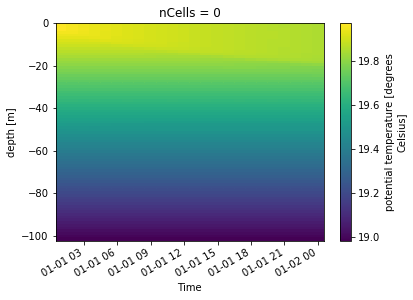

In [8]:
temp.isel(nCells=0).plot()

We can plot the temperature profile at the 20th time step by `.isel(Time=20)`. Use `y='nVertLevels'` to set the vertical axis to depth.

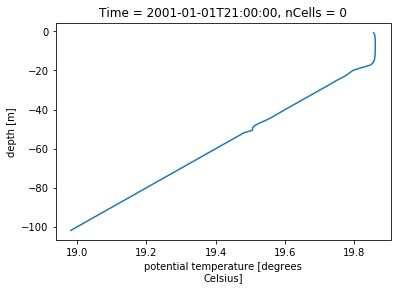

In [9]:
temp.isel(nCells=0, Time=20).plot(y='nVertLevels')

Plot the horizontal map of temperature at surface (`idepth = 0`). We can use either the index of time or depth (`itime` and `idepth`) or the actual value (`time` and `depth`) to select the slice. 

In [10]:
mpasodata1.dataset

<xarray.Dataset>
Dimensions:                        (TWO: 2, Time: 24, maxEdges: 6, maxEdges2: 12, nCells: 16, nEdges: 48, nVertLevels: 80, nVertLevelsLES: 40, nVertLevelsP1: 81, nVertices: 32, vertexDegree: 3)
Coordinates:
  * Time                           (Time) datetime64[ns] 2001-01-01T01:00:00 ... 2001-01-02
  * nVertLevels                    (nVertLevels) int64 0 1 2 3 4 ... 76 77 78 79
  * nCells                         (nCells) int64 0 1 2 3 4 5 ... 11 12 13 14 15
  * nEdges                         (nEdges) int64 0 1 2 3 4 5 ... 43 44 45 46 47
  * nVertices                      (nVertices) int64 0 1 2 3 4 ... 28 29 30 31
  * nVertLevelsLES                 (nVertLevelsLES) int64 0 1 2 3 ... 37 38 39
Dimensions without coordinates: TWO, maxEdges, maxEdges2, nVertLevelsP1, vertexDegree
Data variables:
    xtime                          (Time) |S64 ...
    zMid                           (Time, nCells, nVertLevels) float64 ...
    zTop                           (Time, nCells, nVertLevels) float64 ...
    velocityZonal                  (Time, nCells, nVertLevels) float64 ...
    tIncrementLES                  (Time, nCells, nVertLevels) float64 ...
    sIncrementLES                  (Time, nCells, nVertLevels) float64 ...
    uIncrementLES                  (Time, nCells, nVertLevels) float64 ...
    vIncrementLES                  (Time, nCells, nVertLevels) float64 ...
    temperatureLES                 (Time, nCells, nVertLevelsLES) float64 ...
    salinityLES                    (Time, nCells, nVertLevelsLES) float64 ...
    normalVelocityIncrementLES     (Time, nEdges, nVertLevels) float64 ...
    zLES                           (Time, nCells, nVertLevelsLES) float64 ...
    velocityZonalLES               (Time, nCells, nVertLevelsLES) float64 ...
    velocityMeridionalLES          (Time, nCells, nVertLevelsLES) float64 ...
    velocityMeridional             (Time, nCells, nVertLevels) float64 ...
    bulkRichardsonNumber           (Time, nCells, nVertLevels) float64 ...
    bulkRichardsonNumberBuoy       (Time, nCells, nVertLevels) float64 ...
    unresolvedShear                (Time, nCells, nVertLevels) float64 ...
    boundaryLayerDepth             (Time, nCells) float64 ...
    boundaryLayerDepthEdge         (Time, nEdges) float64 ...
    surfaceFrictionVelocity        (Time, nCells) float64 ...
    penetrativeTemperatureFluxOBL  (Time, nCells) float64 ...
    surfaceBuoyancyForcing         (Time, nCells) float64 ...
    windStressZonal                (Time, nCells) float64 ...
    windStressMeridional           (Time, nCells) float64 ...
    transportVelocityZonal         (Time, nCells, nVertLevels) float64 ...
    transportVelocityMeridional    (Time, nCells, nVertLevels) float64 ...
    RiTopOfCell                    (Time, nCells, nVertLevelsP1) float64 ...
    vertViscTopOfCell              (Time, nCells, nVertLevelsP1) float64 ...
    vertDiffTopOfCell              (Time, nCells, nVertLevelsP1) float64 ...
    vertNonLocalFluxTemp           (Time, nCells, nVertLevelsP1) float64 ...
    temperature                    (Time, nCells, nVertLevels) float64 ...
    salinity                       (Time, nCells, nVertLevels) float64 ...
    latCell                        (nCells) float64 ...
    lonCell                        (nCells) float64 ...
    xCell                          (nCells) float64 ...
    yCell                          (nCells) float64 ...
    zCell                          (nCells) float64 ...
    indexToCellID                  (nCells) int32 ...
    latEdge                        (nEdges) float64 ...
    lonEdge                        (nEdges) float64 ...
    xEdge                          (nEdges) float64 ...
    yEdge                          (nEdges) float64 ...
    zEdge                          (nEdges) float64 ...
    indexToEdgeID                  (nEdges) int32 ...
    latVertex                      (nVertices) float64 ...
    lonVertex                      (nVertices) float64 ...
    xVertex 

In [11]:
temp_domain = mpasodata1.load_variable_map(
    varname='temperature',
    time = '2001-01-01 12:00:00',
    idepth = 0,
    )
print(type(mpasodata1.time.values[12]))

Loading 'temperature'...
  time = 2001-01-01T12:00:00.000000000
 detph = -0.6400000000000001 (m)
<class 'numpy.datetime64'>


Plotting 'potential temperature (degrees Celsius)' on x-y domain (16 data points)...


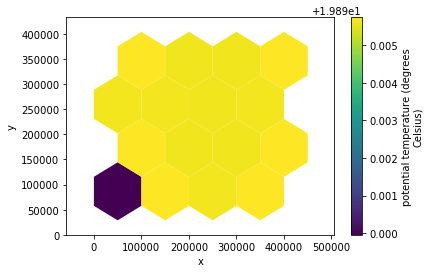

In [12]:
temp_domain.plot(ptype='pcolor')

Wrapping the above two cells into a function and adjust the plot. By default plot the surface value (`idepth=0`) at the last time step (`itime=-1`).

In [13]:
def plot_domain_cell(
    mpasodata, varname,
    itime=-1, idepth=0,
    **kwargs):
    var = mpasodata.load_variable_map(
        varname=varname,
        itime = itime,
        idepth = idepth,
        )
    fig = plt.figure(figsize=[10,8])
    var.plot(ptype='pcolor', linewidth=2, edgecolor='w', **kwargs)
    plt.axis('off')
    plt.gca().set_aspect(1)

Loading 'temperature'...
  time = 2001-01-02T00:00:00.000000000
 detph = -0.6400000000000001 (m)
Plotting 'potential temperature (degrees Celsius)' on x-y domain (16 data points)...


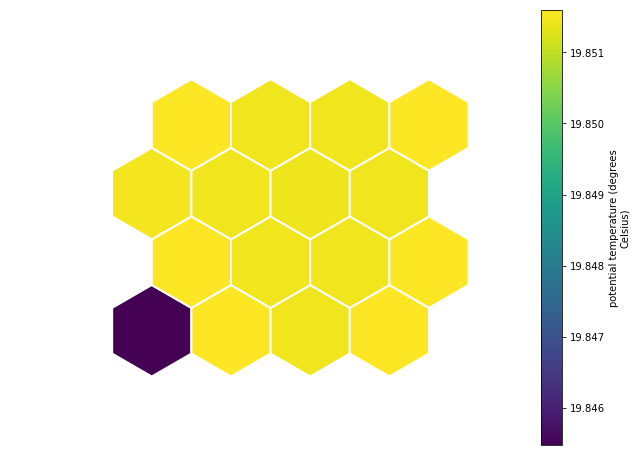

In [14]:
plot_domain_cell(mpasodata1, varname='temperature')

Try a variable `indexToCellID` (the cell ID) that does not have time and depth dimensions. 

Loading 'indexToCellID'...
Plotting 'List of global cell IDs. (unitless)' on x-y domain (16 data points)...


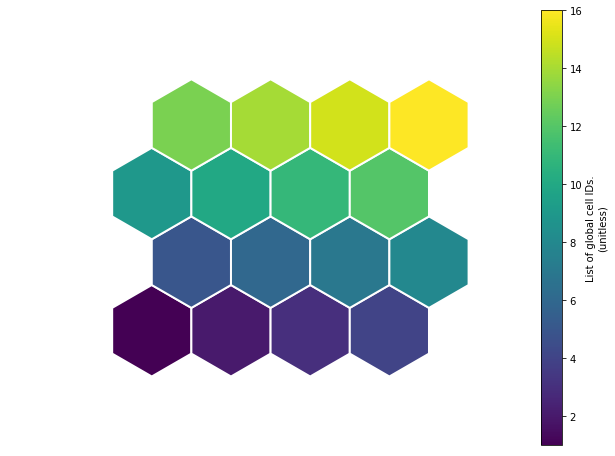

In [15]:
plot_domain_cell(mpasodata1, varname='indexToCellID')